## Indicators of Heavy Traffic on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

The I-94 Traffic Dataset

John Hogue made the dataset available that we'll be working with, and you can download it from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
metro = pd.read_csv('/Users/number1/2024/Data/Project4/Metro.csv')
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [2]:
metro.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [3]:
for i in metro.columns:
    print(i)
    print(metro[i].value_counts())
    print('\n')

holiday
None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64


temp
274.150    128
275.150     89
274.080     85
276.793     78
291.150     73
          ... 
260.970      1
277.240      1
270.190      1
282.190      1
304.900      1
Name: temp, Length: 5843, dtype: int64


rain_1h
0.00    44737
0.25      948
0.51      256
1.02      123
0.30      121
        ...  
1.28        1
1.47        1
4.66        1
2.08        1
2.35        1
Name: rain_1h, Length: 372, dtype: int64


snow_1h
0.00    48141
0.05       14
0.06       12
0.51        6
0.25        6
0.13        6
0.10        6
0.32        5
0.17  

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

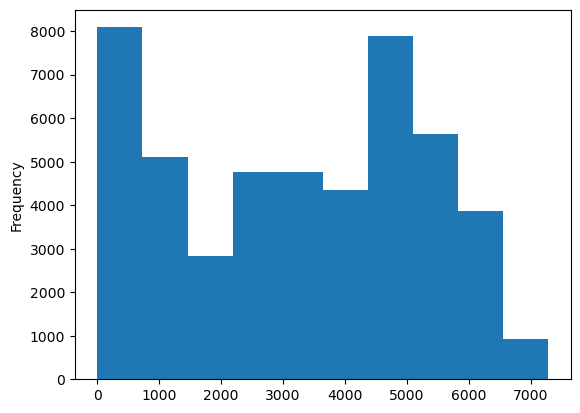

In [5]:
metro['traffic_volume'].plot.hist()

In [6]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.



##  Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
copy_metro = metro.copy()
copy_metro['date_time'] = pd.to_datetime(copy_metro['date_time'])
day = copy_metro[(copy_metro['date_time'].dt.hour >= 6) & (copy_metro['date_time'].dt.hour < 22)]
night = copy_metro[(copy_metro['date_time'].dt.hour < 6) | (copy_metro['date_time'].dt.hour >= 22)]
print(day.shape)
print(night.shape)
print(len(day)+len(night))

(31886, 9)
(16318, 9)
48204


This significant difference in row numbers between day and night is due to a few hours of missing data.

## Traffic Volume: Day vs. Night (II)

Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.

(0.0, 8000.0)

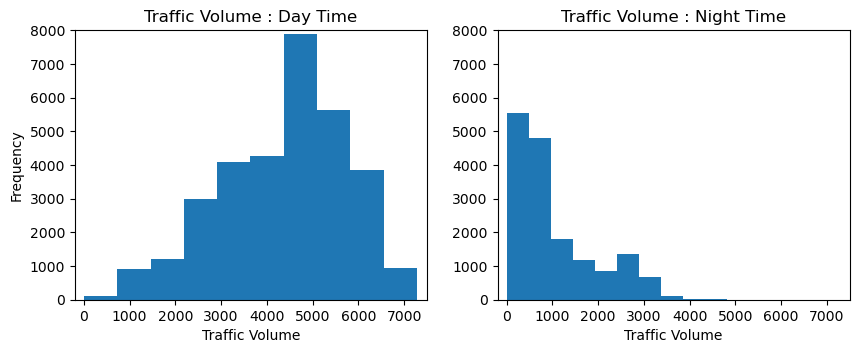

In [8]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume : Day Time')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim([-200,7500])
plt.ylim([0,8000])
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume : Night Time')
plt.xlabel('Traffic Volume')
plt.xlim([-200,7500])
plt.ylim([0,8000])

In [9]:
day['traffic_volume'].describe()

count    31886.000000
mean      4380.270150
std       1368.882867
min          0.000000
25%       3389.000000
50%       4583.000000
75%       5385.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night['traffic_volume'].describe()

count    16318.000000
mean      1070.412428
std        867.841275
min          0.000000
25%        389.000000
50%        748.000000
75%       1476.000000
max       4816.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 60% of the time (because 40% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 1,476.

Although there are still measurements of over 4,500 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [11]:
by_month = day['traffic_volume'].groupby(day['date_time'].dt.month).mean()
by_day_of_week = day['traffic_volume'].groupby(day['date_time'].dt.dayofweek).mean()

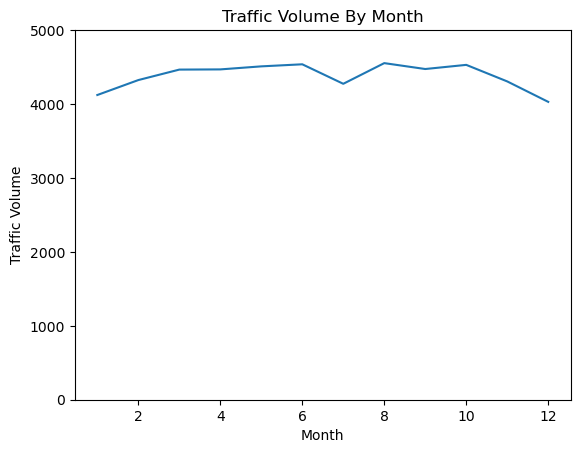

In [12]:
plt.plot(by_month)
plt.ylim([0,5000])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Month')
plt.show()

Traffic Volume is steady thoughout the Year, it's around 4,000 - 4,600 per month. The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

In [13]:
day['year'] = day['date_time'].dt.year

<Axes: xlabel='date_time'>

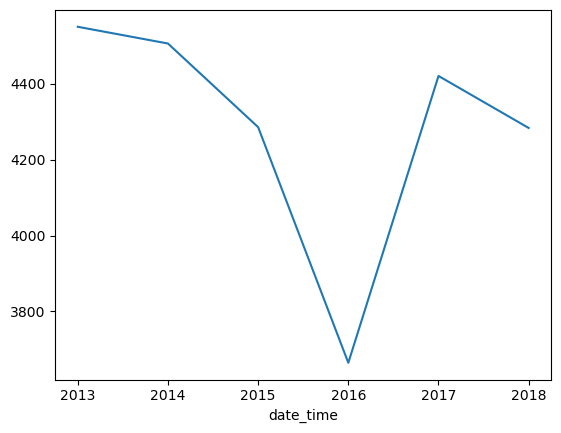

In [14]:
only_july = day[day['date_time'].dt.month == 7]
only_july['traffic_volume'].groupby(only_july['date_time'].dt.year).mean().plot.line()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.



## Time Indicators (II)

Let's now look at a more granular indicator: day number.

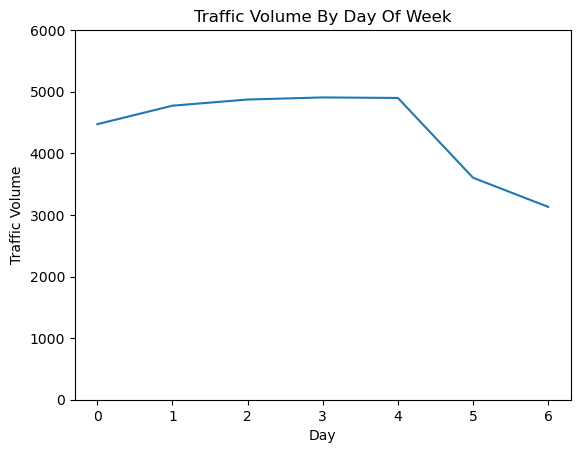

In [15]:
plt.plot(by_day_of_week)
plt.ylim([0,6000])
plt.xlabel('Day')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Day Of Week')
plt.show()

traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 4,800 during business days. Traffic is lighter on weekends, with values below 4,000 cars.



## Time Indicators (III)

Let's now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

In [16]:
day['hours'] = day['date_time'].dt.hour
work = day[day['date_time'].dt.dayofweek < 5]
weekend = day[day['date_time'].dt.dayofweek >= 5]
work_day_by_time = work['traffic_volume'].groupby(work['hours']).mean()
weekend_by_time = weekend['traffic_volume'].groupby(weekend['hours']).mean()

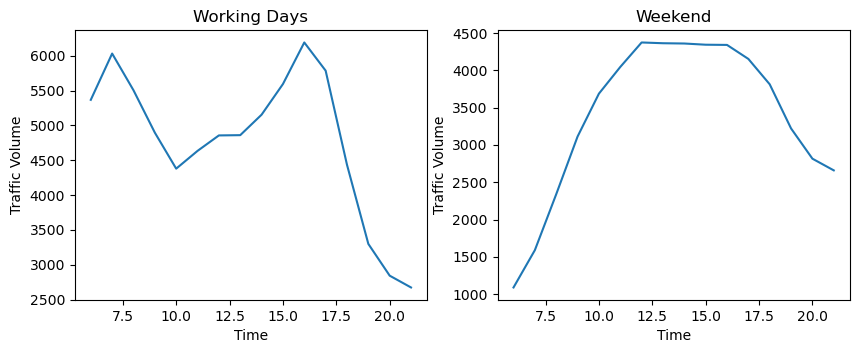

In [17]:
plt.figure(figsize = [10,3.5])
plt.subplot(1,2,1)
plt.plot(work_day_by_time)
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Working Days')
plt.subplot(1,2,2)
plt.plot(weekend_by_time)
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Weekend')
plt.show()

At each hour of the day, the traffic volume is generally higher during working days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On working days, the rush hours are around 7 and 16.


## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [18]:
day.corr()['traffic_volume']

temp              0.107177
rain_1h           0.004060
snow_1h           0.000773
clouds_all       -0.018332
traffic_volume    1.000000
year              0.005604
hours            -0.228999
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.107. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

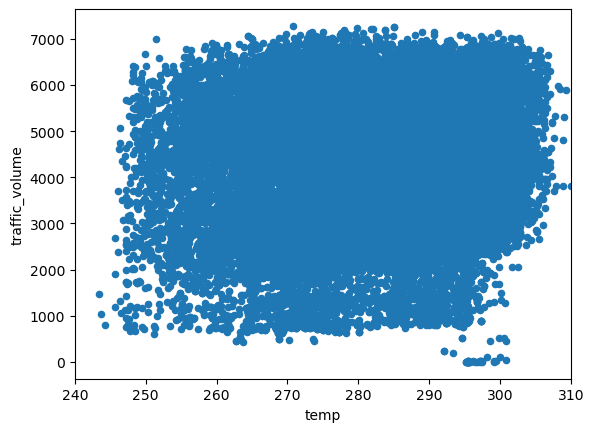

In [23]:
day.plot.scatter(x='temp',y='traffic_volume')
plt.xlim([240,310])
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

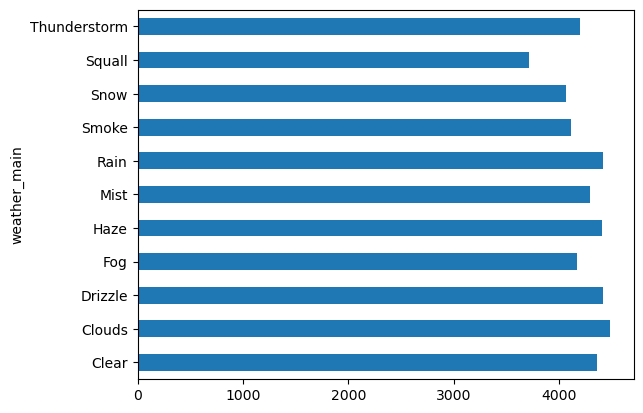

In [26]:
by_weather_main = day['traffic_volume'].groupby(day['weather_main']).mean()
by_weather_main.plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

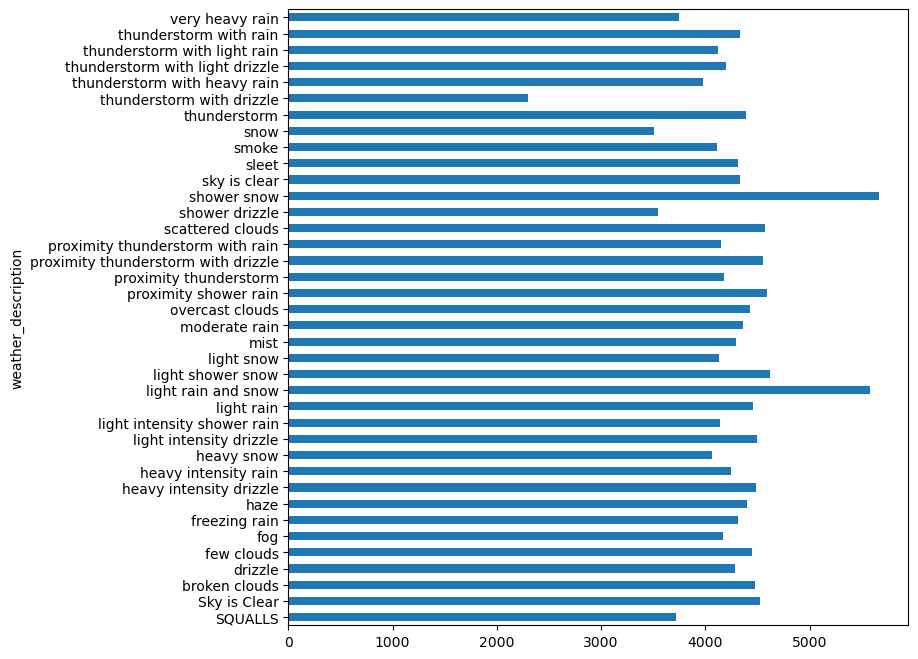

In [35]:
by_weather_description = day['traffic_volume'].groupby(day['weather_description']).mean()
by_weather_description.plot.barh(figsize = [8,8])
plt.show()

It looks like there are 2 weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.



## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

### Time indicators
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on working days compared to the weekends.
- On working days, the rush hours are around 7 and 16.
### Weather indicators
- Shower snow
- Light rain and snow